<a href="https://colab.research.google.com/github/carmc99/IA-Project/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sube el archivo de auth sino existe
from google.colab import files
files.upload()
# Instalar api de kaggle
!pip install kaggle
# Mueve el archivo de auth
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json # Asigna permisos solo al propietario del archivo
!kaggle datasets download -d pralabhpoudel/world-energy-consumption # Descarga el dataset
!unzip world-energy-consumption.zip # Descomprime el dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###1. Lectura y concatenación de los Dataset

In [ ]:
# Lee el archivo CSV y almacena los datos en un DataFrame
df = pd.read_csv('World Energy Consumption.csv')
df

In [ ]:

# establecer umbral de energía renovable
umbral = 30
# crear variable de destino
df['alta_renovable'] = df.apply(lambda row: 1 if row['renewables_share_energy'] > umbral else 0, axis=1)

###2. Análisis de la variable objetivo "alta_renovable"


In [ ]:
#Distribución de la variable objetivo
sns.distplot(df['alta_renovable'])  


En este caso, se puede ver la cantidad de países que tienen un alto y un bajo porcentaje de energía renovable en su producción total de energía.

### 3. Exploracion de variables

#### 3.1 Tipos de energia renovables

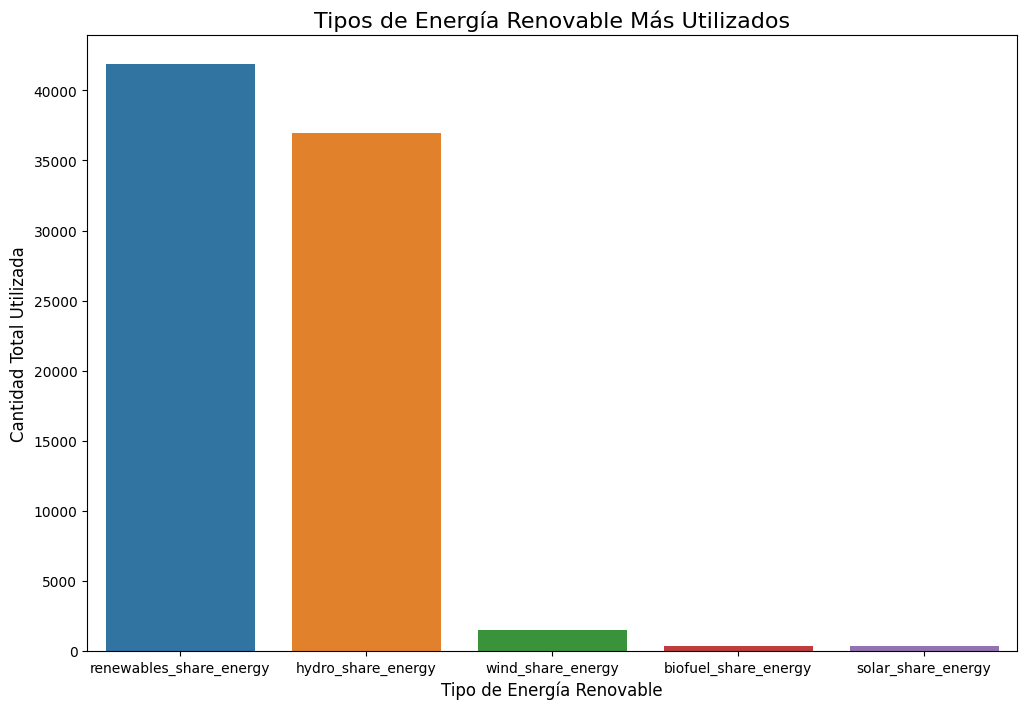

In [ ]:


energy_cols = ['biofuel_share_energy', 'hydro_share_energy', 'solar_share_energy', 'wind_share_energy', 'renewables_share_energy']

# Crear un nuevo DataFrame con las columnas relevantes
energy_df = df[energy_cols]

energy_sum = energy_df.sum()

# Convertir la serie en un DataFrame
energy_sum_df = pd.DataFrame({'Tipo de Energía Renovable': energy_sum.index, 'Cantidad Total Utilizada': energy_sum.values})


energy_sum_df = energy_sum_df.sort_values('Cantidad Total Utilizada', ascending=False)


fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Tipo de Energía Renovable', y='Cantidad Total Utilizada', data=energy_sum_df, ax=ax)
ax.set_xlabel('Tipo de Energía Renovable', fontsize=12)
ax.set_ylabel('Cantidad Total Utilizada', fontsize=12)
ax.set_title('Tipos de Energía Renovable Más Utilizados', fontsize=16)
plt.show()

Como vemos en la grafica anterior la primera energia renovable mas usada en el mundo hasta el año 2019, ha sido la energia hidroelectrica, seguidos de eolica, bio combustibles y por ultimo solar.

#### 3.2 Consumo y produccion de energia anual

<ipython-input-28-889eb3716697>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Tipo de energía", y="Generación de energía (TWh)", data=df_energy_generation_melt, palette="muted", ci=None)


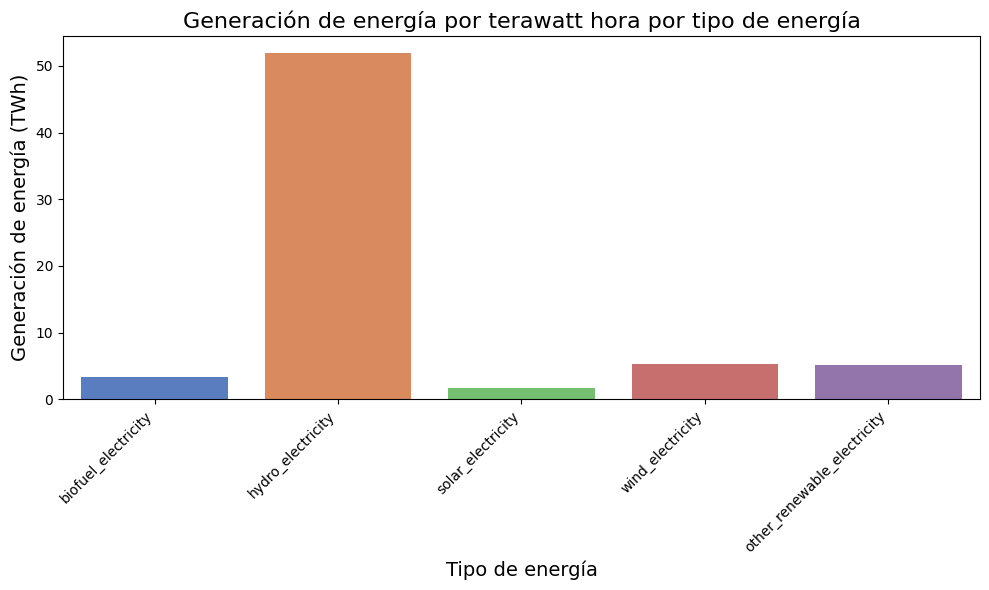

In [ ]:


df_energy_generation = df[['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity', 'other_renewable_electricity']]

# Utilizar el método melt() para convertir el dataframe en un formato largo
df_energy_generation_melt = pd.melt(df_energy_generation, var_name="Tipo de energía", value_name="Generación de energía (TWh)")

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Tipo de energía", y="Generación de energía (TWh)", data=df_energy_generation_melt, palette="muted", ci=None)
plt.title("Generación de energía por terawatt hora por tipo de energía", fontsize=16)
plt.xlabel("Tipo de energía", fontsize=14)
plt.ylabel("Generación de energía (TWh)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-29-a51478a57ff5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Tipo de energía", y="Consumo de energía (TWh)", data=df_energy_consumption_melt, palette="muted", ci=None)


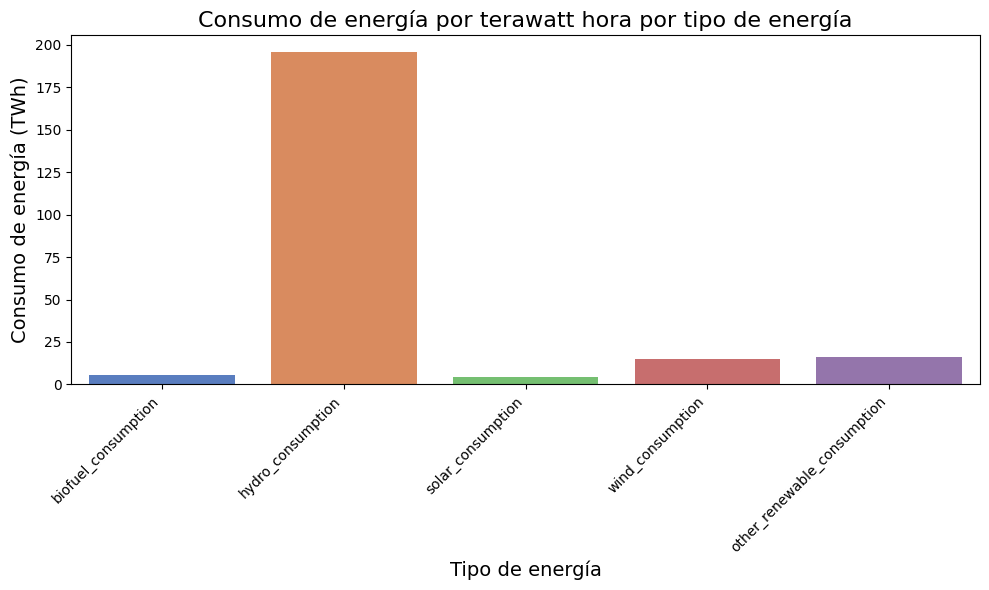

In [ ]:


df_energy_consumption = df[['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'other_renewable_consumption']]

# Utilizar el método melt() para convertir el dataframe en un formato largo
df_energy_consumption_melt = pd.melt(df_energy_consumption, var_name="Tipo de energía", value_name="Consumo de energía (TWh)")


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Tipo de energía", y="Consumo de energía (TWh)", data=df_energy_consumption_melt, palette="muted", ci=None)
plt.title("Consumo de energía por terawatt hora por tipo de energía", fontsize=16)
plt.xlabel("Tipo de energía", fontsize=14)
plt.ylabel("Consumo de energía (TWh)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En el grafico anterior podemos ver que la mayor parte del consumo de energia renovables proviene de la energia hidroelectrica, pero en cuanto a los datos vemos que existe una disparidad entre energia generada y consumida, esto debido a que no existen datos los primeros años en muchos paises.

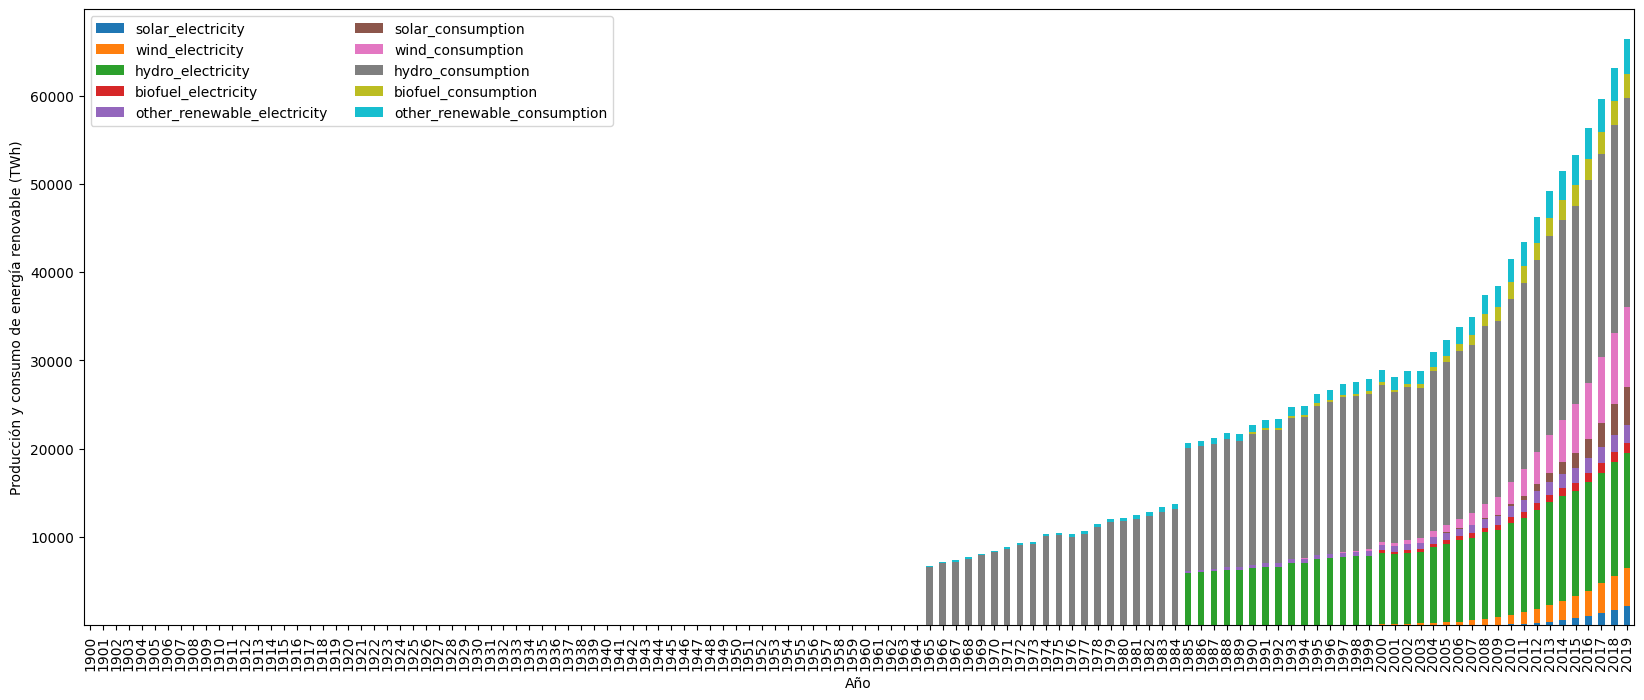

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por año y tipo de energía
df_renewables = df[df['year'] < 2020].groupby(['year']).agg({
    'solar_electricity': 'sum',
    'wind_electricity': 'sum',
    'hydro_electricity': 'sum',
    'biofuel_electricity': 'sum',
    'other_renewable_electricity': 'sum',
    'solar_consumption': 'sum',
    'wind_consumption': 'sum',
    'hydro_consumption': 'sum',
    'biofuel_consumption': 'sum',
    'other_renewable_consumption': 'sum',
})


fig, ax = plt.subplots(figsize=(20, 8))

df_renewables.plot(kind='bar', stacked=True, ax=ax)


ax.set_xlabel('Año')
ax.set_ylabel('Producción y consumo de energía renovable (TWh)')


ax.legend(loc='upper left', ncol=2)

plt.show()


Vemos que a partir del año 1965 se empezo a llevar un reporte sobre el consumo de energias renovables, sin embargo no fue sino hasta años posteriores donde se logra visualizar la cantidad de energia generada, esto debido a que en muchos paises no existen registros en periodos de tiempo anteiorres.

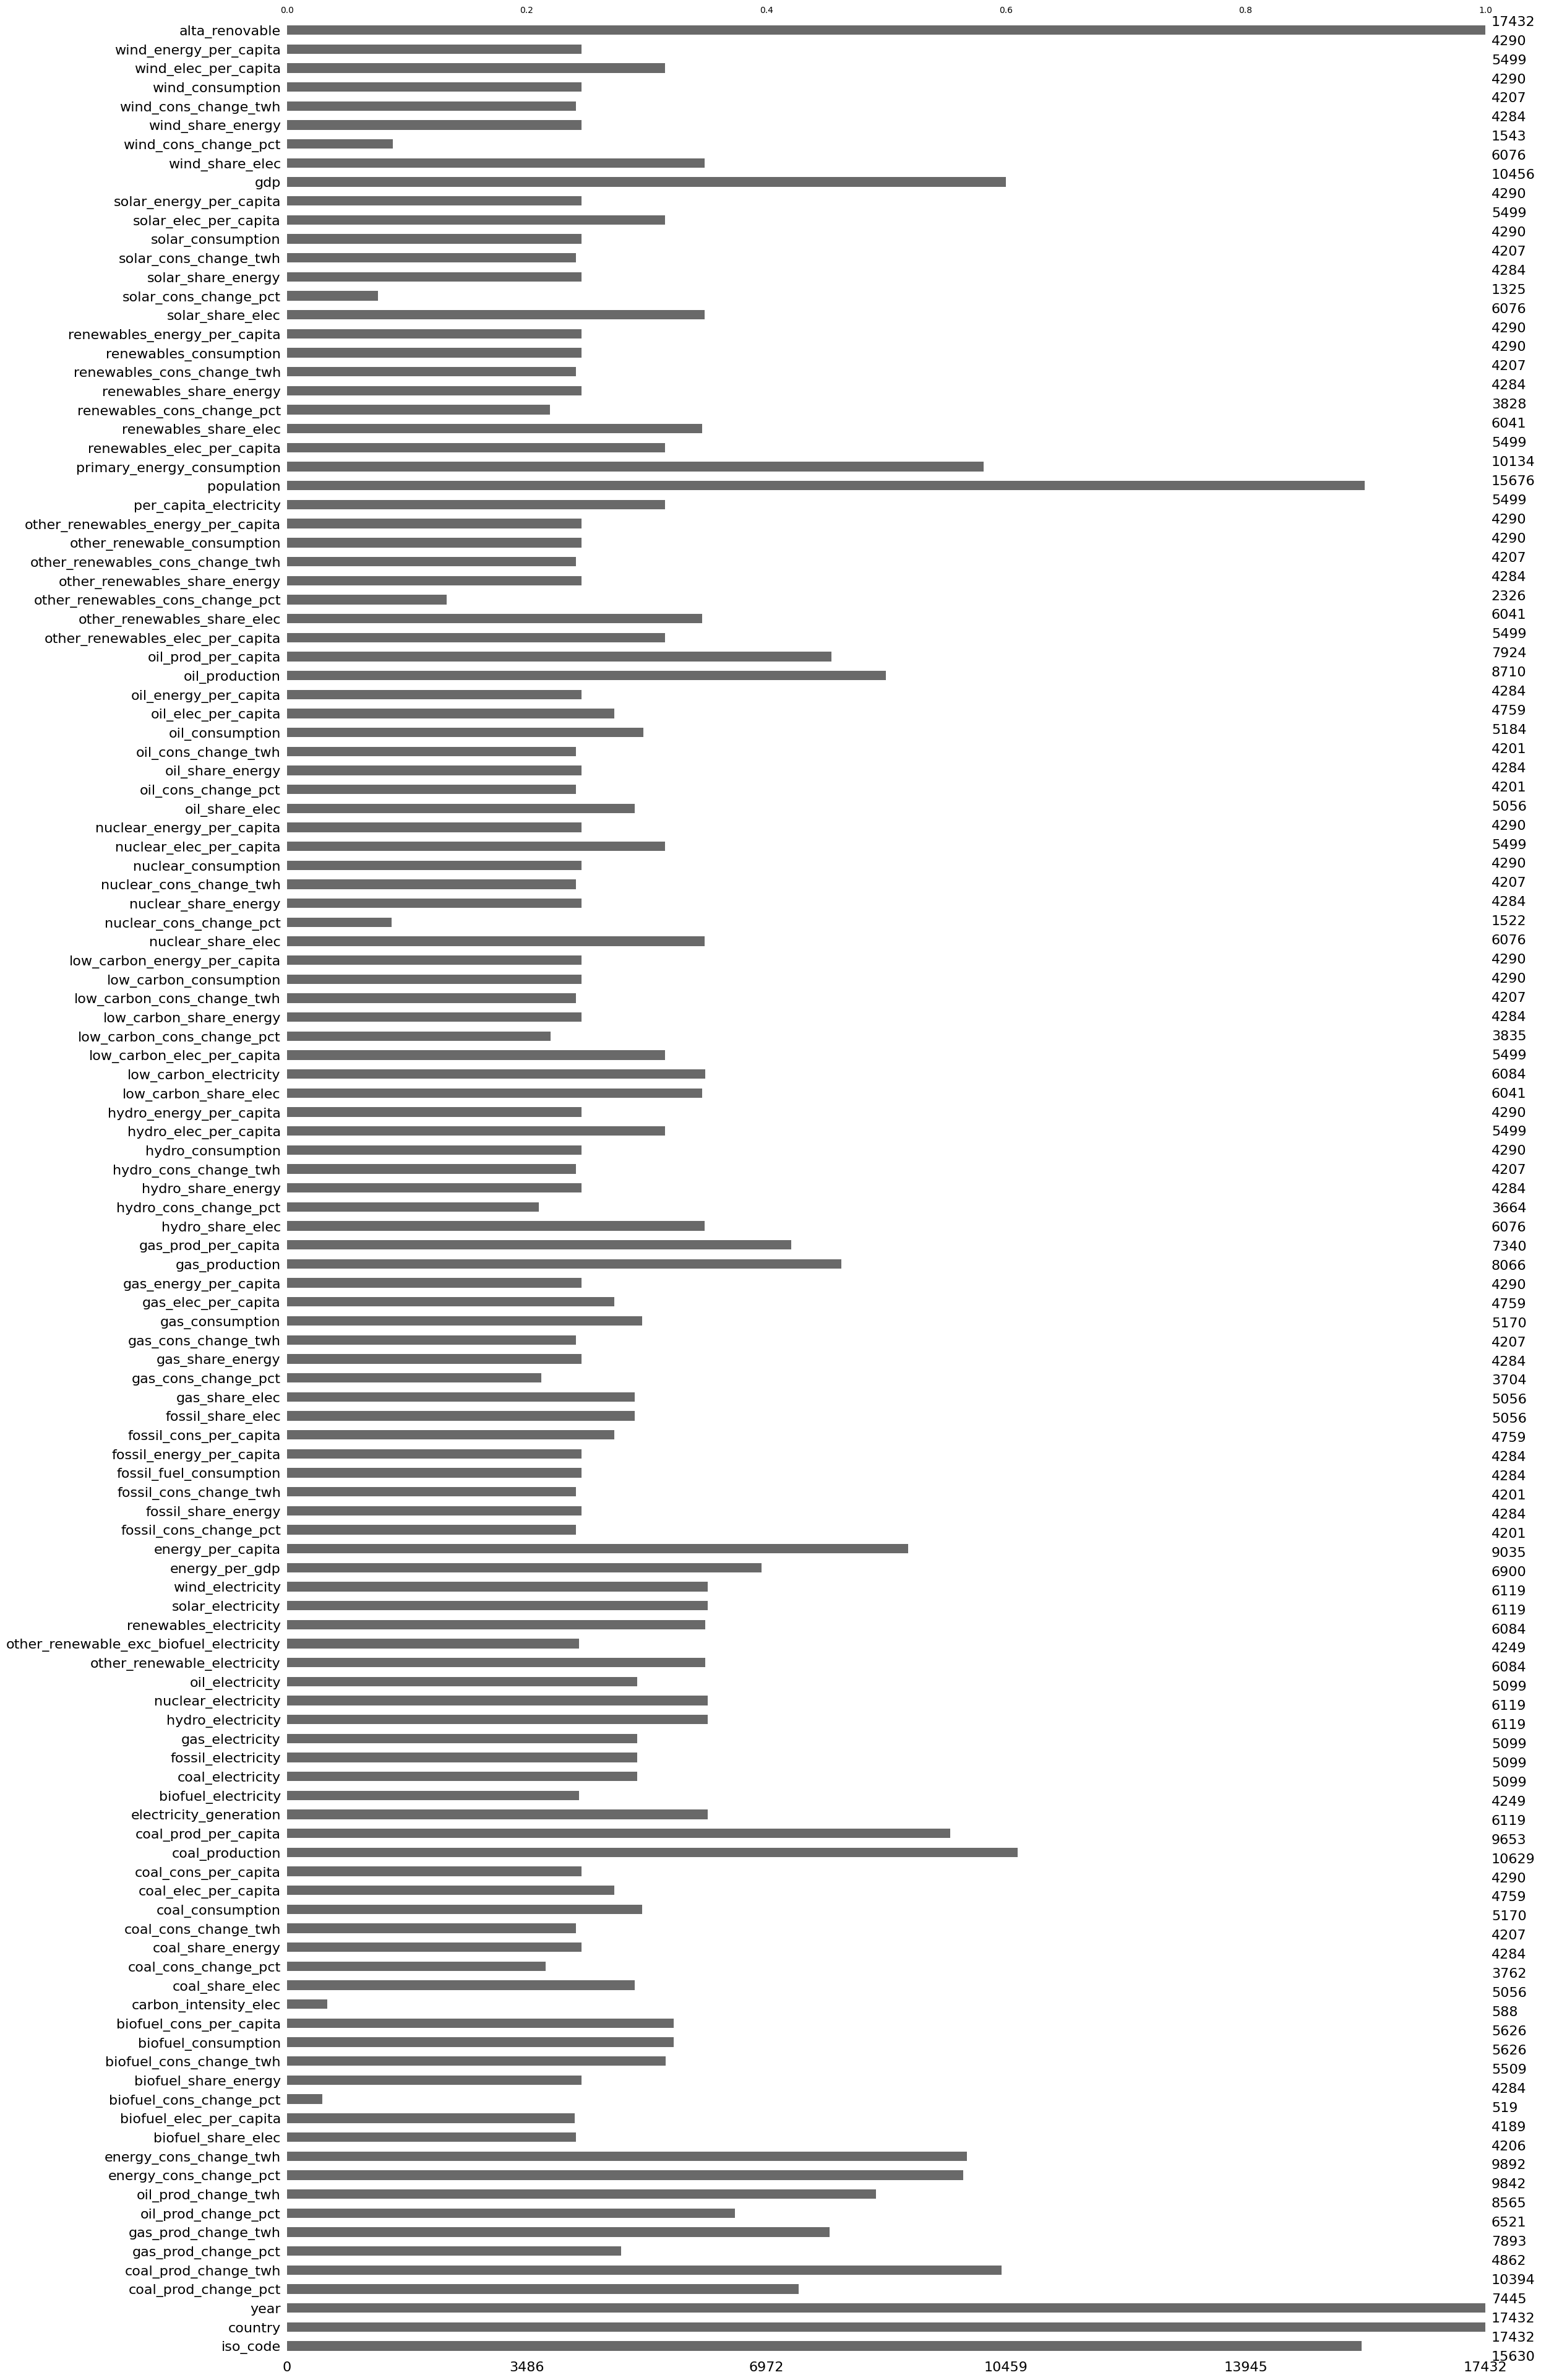

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizar los valores perdidos
msno.bar(df)
plt.show()


En el gráfico de barras donde cada barra representa el porcentaje de valores perdidos para cada variable del dataset. La altura de la barra indica el porcentaje de valores no nulos en la variable y la parte gris indica el porcentaje de valores nulos.